# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city.city_name not in cities:
        cities.append(city.city_name)
        countries.append(city.country_code)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Empty lists that will be populated during the API calling loop
wx_cities = []
wx_countries = []
lats = []
lngs = []
temps = []
humids = []
clouds = []
winds = []
wx_city_count = 0

f = open('output_data/wx_log.txt', 'w', encoding = 'utf-8')

for city in cities:
    
    wx_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    response = requests.get(wx_url).json()
    
    if response['cod'] == 200:

        wx_city_count += 1
        wx_cities.append(response['name'])              # Get the name of the city from the WX API
        wx_countries.append(response['sys']['country']) # Get the country code of the city from the WX API
        lats.append(response['coord']['lat'])           # Also get lat / long from WX API since city names can be duplicated
        lngs.append(response['coord']['lon'])           # the data received may from a different city than in the initial list
        temps.append(response['main']['temp_max'])      # Get max temp for the day
        humids.append(response['main']['humidity'])     # Get current humidity, cloud cover and wind speed
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        
        # Print output as WX data is recieved.
        out_text = f"{wx_city_count} - City: {response['name']}  ID: {response['id']} Lat: {lats[-1]}, Lng {lngs[-1]}, Temp: {temps[-1]}, Humidity: {humids[-1]}, Cloud Cover: {clouds[-1]}%, Wind Speed: {winds[-1]}"
    
    else:
        # Print notification if a city was not found.
        out_text = f"*** City {city} not found! ***"
    
    print(out_text)
    f.write(out_text + '\n')

f.close()

# Get current time after the data has been received.  Used in the chart titles later on.
t_api = time.localtime()


1 - City: Kodīnar  ID: 1266397 Lat: 20.7903, Lng 70.7031, Temp: 76.86, Humidity: 66, Cloud Cover: 0%, Wind Speed: 8.55
2 - City: Zagora  ID: 6547302 Lat: 30.3484, Lng -5.8365, Temp: 72.93, Humidity: 27, Cloud Cover: 0%, Wind Speed: 4.59
3 - City: Kapaa  ID: 5848280 Lat: 22.0752, Lng -159.319, Temp: 82.38, Humidity: 77, Cloud Cover: 20%, Wind Speed: 4
4 - City: Coquimbo  ID: 3893629 Lat: -29.9533, Lng -71.3436, Temp: 62.33, Humidity: 59, Cloud Cover: 0%, Wind Speed: 12.66
5 - City: Hobart  ID: 2163355 Lat: -42.8794, Lng 147.3294, Temp: 50.02, Humidity: 92, Cloud Cover: 75%, Wind Speed: 3
6 - City: New Norfolk  ID: 2155415 Lat: -42.7826, Lng 147.0587, Temp: 49.66, Humidity: 81, Cloud Cover: 100%, Wind Speed: 3
7 - City: Takoradze  ID: 2294915 Lat: 4.8845, Lng -1.7554, Temp: 78.35, Humidity: 84, Cloud Cover: 100%, Wind Speed: 6.73
8 - City: Corcoran  ID: 5339539 Lat: 36.098, Lng -119.5604, Temp: 69.96, Humidity: 29, Cloud Cover: 9%, Wind Speed: 7.81
9 - City: Moss Vale  ID: 2156777 Lat: -

66 - City: Tatarsk  ID: 1490003 Lat: 55.219, Lng 75.9828, Temp: 49.82, Humidity: 70, Cloud Cover: 100%, Wind Speed: 18.12
67 - City: Vaini  ID: 4032243 Lat: -21.2, Lng -175.2, Temp: 73.56, Humidity: 78, Cloud Cover: 40%, Wind Speed: 11.5
68 - City: Pontianak  ID: 1630789 Lat: -0.0333, Lng 109.3333, Temp: 75.18, Humidity: 100, Cloud Cover: 90%, Wind Speed: 2.3
69 - City: Alta Floresta  ID: 6316343 Lat: -9.8756, Lng -56.0861, Temp: 89.42, Humidity: 55, Cloud Cover: 40%, Wind Speed: 4.61
70 - City: Nieuw Amsterdam  ID: 3383434 Lat: 5.8833, Lng -55.0833, Temp: 82.02, Humidity: 82, Cloud Cover: 40%, Wind Speed: 5.75
71 - City: Ponta do Sol  ID: 2264557 Lat: 32.6667, Lng -17.1, Temp: 70.72, Humidity: 67, Cloud Cover: 30%, Wind Speed: 7.65
72 - City: Salekhard  ID: 1493197 Lat: 66.53, Lng 66.6019, Temp: 28.99, Humidity: 83, Cloud Cover: 98%, Wind Speed: 14.27
73 - City: Norman Wells  ID: 6089245 Lat: 65.282, Lng -126.8329, Temp: 42.84, Humidity: 65, Cloud Cover: 40%, Wind Speed: 4.61
74 - Cit

131 - City: Grindavik  ID: 3416888 Lat: 63.8424, Lng -22.4338, Temp: 46.87, Humidity: 93, Cloud Cover: 75%, Wind Speed: 11.5
132 - City: Arrondissement d'Arcachon  ID: 6621469 Lat: 44.5875, Lng -1.0519, Temp: 44.65, Humidity: 81, Cloud Cover: 0%, Wind Speed: 2.3
133 - City: Anloga  ID: 2304548 Lat: 5.7947, Lng 0.8973, Temp: 79.02, Humidity: 78, Cloud Cover: 96%, Wind Speed: 8.48
*** City chikoy not found! ***
134 - City: Ayan  ID: 2027316 Lat: 56.45, Lng 138.1667, Temp: 37.92, Humidity: 70, Cloud Cover: 2%, Wind Speed: 9.55
135 - City: Port Hedland  ID: 2063042 Lat: -20.3167, Lng 118.5667, Temp: 71.65, Humidity: 46, Cloud Cover: 99%, Wind Speed: 0
136 - City: Assiut  ID: 359783 Lat: 27.181, Lng 31.1837, Temp: 71.78, Humidity: 47, Cloud Cover: 2%, Wind Speed: 10.13
137 - City: Ust-Maya  ID: 2013918 Lat: 60.4167, Lng 134.5333, Temp: 21.34, Humidity: 97, Cloud Cover: 100%, Wind Speed: 1.39
138 - City: Bathsheba  ID: 3374083 Lat: 13.2167, Lng -59.5167, Temp: 86.61, Humidity: 62, Cloud Cove

*** City dolbeau not found! ***
197 - City: Hambantota  ID: 1244926 Lat: 6.1241, Lng 81.1185, Temp: 78.62, Humidity: 80, Cloud Cover: 31%, Wind Speed: 12.62
*** City mys shmidta not found! ***
198 - City: Coro  ID: 3645213 Lat: 11.4045, Lng -69.6734, Temp: 85.41, Humidity: 68, Cloud Cover: 33%, Wind Speed: 20.31
199 - City: Ladário  ID: 3459352 Lat: -19.0047, Lng -57.6017, Temp: 104.29, Humidity: 29, Cloud Cover: 9%, Wind Speed: 16.11
200 - City: Saldanha  ID: 3361934 Lat: -33.0117, Lng 17.9442, Temp: 55.45, Humidity: 73, Cloud Cover: 24%, Wind Speed: 7.49
201 - City: San Juan del Cesar  ID: 3669469 Lat: 10.7711, Lng -73.0031, Temp: 88.43, Humidity: 56, Cloud Cover: 28%, Wind Speed: 7.78
202 - City: Seymchan  ID: 2121373 Lat: 62.8833, Lng 152.4333, Temp: -1.68, Humidity: 85, Cloud Cover: 54%, Wind Speed: 3.31
203 - City: Abu Dhabi  ID: 292968 Lat: 24.4667, Lng 54.3667, Temp: 84.31, Humidity: 70, Cloud Cover: 0%, Wind Speed: 5.75
204 - City: Methóni  ID: 257122 Lat: 36.8197, Lng 21.7049

264 - City: Buinsk  ID: 571155 Lat: 54.95, Lng 48.2833, Temp: 49.89, Humidity: 72, Cloud Cover: 100%, Wind Speed: 12.8
265 - City: Arucas  ID: 2521519 Lat: 28.1198, Lng -15.5233, Temp: 68.83, Humidity: 85, Cloud Cover: 94%, Wind Speed: 10.85
266 - City: Vanavara  ID: 2013727 Lat: 60.34, Lng 102.2797, Temp: 31.19, Humidity: 76, Cloud Cover: 100%, Wind Speed: 11.32
267 - City: La Palma  ID: 5364022 Lat: 33.8464, Lng -118.0467, Temp: 73.04, Humidity: 81, Cloud Cover: 75%, Wind Speed: 1.01
268 - City: Athens  ID: 264371 Lat: 37.9795, Lng 23.7162, Temp: 69.22, Humidity: 82, Cloud Cover: 6%, Wind Speed: 1.01
269 - City: East London  ID: 1006984 Lat: -33.0153, Lng 27.9116, Temp: 61.75, Humidity: 67, Cloud Cover: 61%, Wind Speed: 19.98
270 - City: Genhe  ID: 2037252 Lat: 50.7833, Lng 121.5167, Temp: 29.41, Humidity: 89, Cloud Cover: 0%, Wind Speed: 2.06
271 - City: Aktau  ID: 610612 Lat: 43.65, Lng 51.2, Temp: 46.98, Humidity: 38, Cloud Cover: 0%, Wind Speed: 12.46
272 - City: Coxim  ID: 34652

330 - City: Chernyshevskiy  ID: 2025456 Lat: 63.0128, Lng 112.4714, Temp: 28.47, Humidity: 83, Cloud Cover: 72%, Wind Speed: 10.29
331 - City: Dwārka  ID: 1272140 Lat: 22.2394, Lng 68.9678, Temp: 81.21, Humidity: 63, Cloud Cover: 73%, Wind Speed: 16.71
332 - City: Yinzhu  ID: 1792087 Lat: 35.8786, Lng 119.9753, Temp: 44.62, Humidity: 72, Cloud Cover: 100%, Wind Speed: 3.62
*** City warqla not found! ***
333 - City: Halle  ID: 2911522 Lat: 51.5, Lng 12, Temp: 47.16, Humidity: 85, Cloud Cover: 0%, Wind Speed: 4.61
334 - City: Edgewater  ID: 4154205 Lat: 28.9889, Lng -80.9023, Temp: 88.18, Humidity: 65, Cloud Cover: 40%, Wind Speed: 11.5
335 - City: Asău  ID: 686090 Lat: 46.4333, Lng 26.4, Temp: 45.95, Humidity: 69, Cloud Cover: 99%, Wind Speed: 1.3
336 - City: Mabaruma  ID: 3377301 Lat: 8.2, Lng -59.7833, Temp: 76.3, Humidity: 95, Cloud Cover: 100%, Wind Speed: 4.27
337 - City: Baharly  ID: 162158 Lat: 38.4362, Lng 57.4316, Temp: 56.34, Humidity: 21, Cloud Cover: 0%, Wind Speed: 8.23
***

397 - City: Roald  ID: 3141667 Lat: 62.5833, Lng 6.1333, Temp: 46.33, Humidity: 76, Cloud Cover: 75%, Wind Speed: 13.8
398 - City: Guapó  ID: 3461943 Lat: -16.8306, Lng -49.5319, Temp: 86.38, Humidity: 48, Cloud Cover: 100%, Wind Speed: 8.39
399 - City: Luwuk  ID: 1637001 Lat: -0.9516, Lng 122.7875, Temp: 76.41, Humidity: 79, Cloud Cover: 100%, Wind Speed: 2.84
400 - City: Kyra  ID: 2021041 Lat: 49.5776, Lng 111.9753, Temp: 31.69, Humidity: 59, Cloud Cover: 43%, Wind Speed: 3.76
401 - City: Hualmay  ID: 3939761 Lat: -11.0964, Lng -77.6139, Temp: 67.33, Humidity: 73, Cloud Cover: 11%, Wind Speed: 12.59
402 - City: Atasū  ID: 1526041 Lat: 48.6814, Lng 71.6433, Temp: 39.45, Humidity: 52, Cloud Cover: 3%, Wind Speed: 10.8
403 - City: Mount Gambier  ID: 2156643 Lat: -37.8333, Lng 140.7667, Temp: 44.51, Humidity: 87, Cloud Cover: 98%, Wind Speed: 5.75
404 - City: Hopfgarten  ID: 2899194 Lat: 50.9833, Lng 11.2667, Temp: 42.44, Humidity: 79, Cloud Cover: 65%, Wind Speed: 2.8
405 - City: Poddor

463 - City: Dakar  ID: 2253354 Lat: 14.6937, Lng -17.4441, Temp: 83.28, Humidity: 78, Cloud Cover: 0%, Wind Speed: 4.61
464 - City: Abu Samrah  ID: 172515 Lat: 35.3029, Lng 37.1841, Temp: 66.2, Humidity: 58, Cloud Cover: 0%, Wind Speed: 7.02
465 - City: Rock Sound  ID: 3571592 Lat: 24.9, Lng -76.2, Temp: 80.47, Humidity: 75, Cloud Cover: 98%, Wind Speed: 10.11
466 - City: Lisala  ID: 211734 Lat: 2.15, Lng 21.5167, Temp: 71.2, Humidity: 95, Cloud Cover: 92%, Wind Speed: 2.55
467 - City: Cockburn Town  ID: 3576994 Lat: 21.4612, Lng -71.1419, Temp: 85.96, Humidity: 66, Cloud Cover: 75%, Wind Speed: 10.36
*** City bolungarvik not found! ***
468 - City: Lagos  ID: 2332453 Lat: 6.5833, Lng 3.75, Temp: 77.32, Humidity: 94, Cloud Cover: 100%, Wind Speed: 2.24
469 - City: Balkanabat  ID: 161616 Lat: 39.5108, Lng 54.3671, Temp: 58.23, Humidity: 22, Cloud Cover: 1%, Wind Speed: 3.51
470 - City: Buchanan  ID: 2278158 Lat: 5.8808, Lng -10.0467, Temp: 77.4, Humidity: 90, Cloud Cover: 100%, Wind Spee

*** City maghama not found! ***
529 - City: Svetlaya  ID: 2015852 Lat: 46.5389, Lng 138.3297, Temp: 41.31, Humidity: 71, Cloud Cover: 1%, Wind Speed: 6.98
530 - City: Darhan  ID: 2031964 Lat: 49.4867, Lng 105.9228, Temp: 35.6, Humidity: 52, Cloud Cover: 100%, Wind Speed: 4.23
531 - City: San Juan  ID: 3837213 Lat: -31.5375, Lng -68.5364, Temp: 76.35, Humidity: 15, Cloud Cover: 0%, Wind Speed: 6.44
*** City kosya not found! ***
532 - City: Marsh Harbour  ID: 3571913 Lat: 26.5412, Lng -77.0636, Temp: 80.67, Humidity: 73, Cloud Cover: 100%, Wind Speed: 9.42
533 - City: Äänekoski  ID: 662096 Lat: 62.6946, Lng 25.818, Temp: 26.67, Humidity: 97, Cloud Cover: 36%, Wind Speed: 3.58
534 - City: Richards Bay  ID: 962367 Lat: -28.783, Lng 32.0377, Temp: 70.59, Humidity: 64, Cloud Cover: 83%, Wind Speed: 20.87
535 - City: Buala  ID: 2109528 Lat: -8.145, Lng 159.5921, Temp: 82.33, Humidity: 69, Cloud Cover: 33%, Wind Speed: 4.79
536 - City: Severodvinsk  ID: 496285 Lat: 64.5635, Lng 39.8302, Temp: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create DataFram
weather_df = pd.DataFrame({
    'City': wx_cities,
    'Country': wx_countries,
    'Lat': lats,
    'Long': lngs,
    'Temp': temps,
    'Humidity': humids,
    'Clouds': clouds,
    'Winds': winds
})

# Output DataFrame to csv file
weather_df.to_csv(output_data_file, index=False, header=True)

In [9]:
# Display DataFrame for reference
weather_df.head()

,City,Country,Lat,Long,Temp,Humidity,Clouds,Winds
0,Kodīnar,IN,20.7903,70.7031,76.86,66,0,8.55
1,Zagora,MA,30.3484,-5.8365,72.93,27,0,4.59
2,Kapaa,US,22.0752,-159.3190,82.38,77,20,4.00
3,Coquimbo,CL,-29.9533,-71.3436,62.33,59,0,12.66
4,Hobart,AU,-42.8794,147.3294,50.02,92,75,3.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# None of the cities have a humidity greater than 100%, the the code is included for future runs

In [11]:
#  Get the indices of cities that have humidity over 100%.
drops = weather_df.index[weather_df['Humidity'] > 100]


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(drops, inplace=False)

In [13]:
clean_city_data.head()


,City,Country,Lat,Long,Temp,Humidity,Clouds,Winds
0,Kodīnar,IN,20.7903,70.7031,76.86,66,0,8.55
1,Zagora,MA,30.3484,-5.8365,72.93,27,0,4.59
2,Kapaa,US,22.0752,-159.3190,82.38,77,20,4.00
3,Coquimbo,CL,-29.9533,-71.3436,62.33,59,0,12.66
4,Hobart,AU,-42.8794,147.3294,50.02,92,75,3.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [14]:
# Create date string to add to plot titles
analysis_date = f"{t_api.tm_mon}/{t_api.tm_mday}/{t_api.tm_year}"


## Latitude vs. Temperature Plot

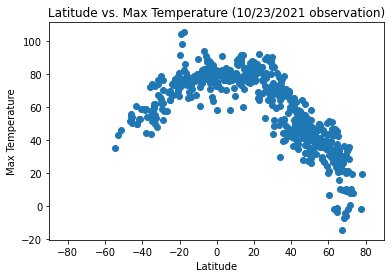

In [15]:
# Build scatter plot for desired criteria
plt.scatter(clean_city_data['Lat'], clean_city_data['Temp'])
plt.title(f"Latitude vs. Max Temperature ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.xlim(-90,90)

plt.show
plt.savefig('output_data/lat_vs_temp.png')

Scatter plot depicting maximum temperture vs. latitude.  Upon visual inspection, there appears to be an increase in temparature as the latitude approaches the equator.

## Latitude vs. Humidity Plot

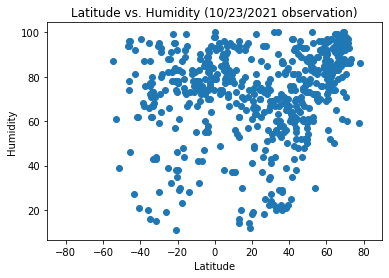

In [16]:
# Build scatter plot for desired criteria
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title(f"Latitude vs. Humidity ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(-90,90)

plt.show
plt.savefig('output_data/lat_vs_humid.png')

Scatter plot of humidity vs. latitude.  Although humidities vary widely across all latitudes, there seems to be a definite lack of lower humidites and the latitudes approach the equator.

## Latitude vs. Cloudiness Plot

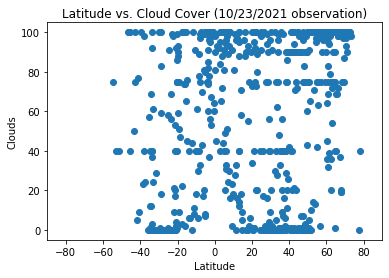

In [17]:
# Build scatter plot for desired criteria
plt.scatter(clean_city_data['Lat'], clean_city_data['Clouds'])
plt.title(f"Latitude vs. Cloud Cover ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.xlim(-90,90)

plt.show
plt.savefig('output_data/lat_vs_clouds.png')

Scatter plot of cloud cover vs. latitude.  It looks like latitude have little to no impact on the amount of cloud cover.  However, cloudiness is quite variable.  It would take more data than a single day's worth to make an informed opinion.

## Latitude vs. Wind Speed Plot

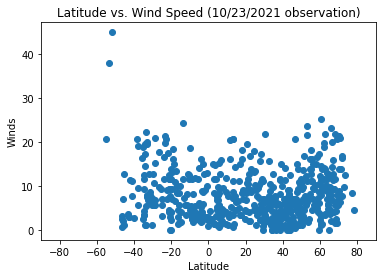

In [18]:
# Build scatter plot for desired criteria
plt.scatter(clean_city_data['Lat'], clean_city_data['Winds'])
plt.title(f"Latitude vs. Wind Speed ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Winds')
plt.xlim(-90,90)

plt.show
plt.savefig('output_data/lat_vs_winds.png')

Scatter plot of wind speed vs. latitude.  Like cloud cover above, wind speed is highly variable and would require many more observations for a satisfactory analysis.

## Linear Regression

In [19]:
# List to characterize the strength of the correlations
association = ['Weak', 'Moderate', 'Strong']

# Create DataFrames for Northenr and Souther hemispheres
north_hem = clean_city_data.index[weather_df['Lat'] >= 0]
south_hem = clean_city_data.index[weather_df['Lat'] < 0]

north_data = clean_city_data.drop(south_hem, inplace=False)
south_data = clean_city_data.drop(north_hem, inplace=False)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R = -0.87   Slope = -0.99
Strong Negative Correlation



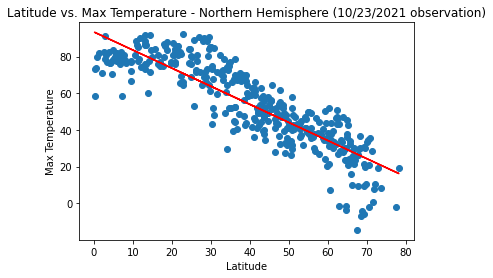

<Figure size 432x288 with 0 Axes>

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for maximum temperature and latutude for the Northern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(north_data['Lat'], north_data['Temp'])[0], 2)

# establish linear regression values
model = linregress(north_data['Lat'], north_data['Temp'])

# Print the strength and direction of correlation
print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = north_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(north_data['Lat'], north_data['Temp'])
plt.title(f"Latitude vs. Max Temperature - Northern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.plot(north_data['Lat'], y_values, color='red')

plt.show()
plt.savefig('output_data/lat_vs_temp_lr_north.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R = 0.77   Slope = 0.70
Strong Positive Correlation



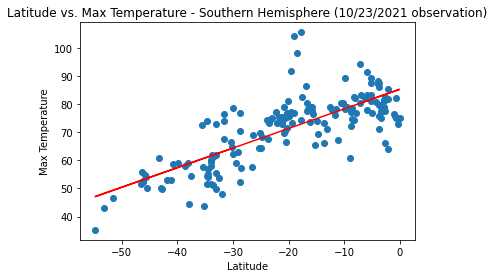

<Figure size 432x288 with 0 Axes>

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for maximum temperature and latutude for the Southern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(south_data['Lat'], south_data['Temp'])[0], 2)

# establish linear regression values
model = linregress(south_data['Lat'], south_data['Temp'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = south_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(south_data['Lat'], south_data['Temp'])
plt.title(f"Latitude vs. Max Temperature - Southern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.plot(south_data['Lat'], y_values, color='red')

plt.show()
plt.savefig('output_data/lat_vs_temp_lr_south.png')

The preceding two plots show the linear relationship between maximum temperature and latitude for cities in the Northern and Southern hemispheres.  Both plots indicate a strong correlation of maximum temperature to latitude.  However, the correlation for the Southern hemisphere is somewhat less strong, with a Correlation Coefficient of 0.73, as compared to the Northern hemisphere's Correlation Coeffiecient of -0.84.  In addition, the Northern hemisphere's strong Correlation Coefficient notwithstanding, visual inspection indicates that the relationship may not me entirely linear, as max temperatures start to fall well below the linear regression line a the locations approach higher latitudes.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R = 0.24   Slope = 0.24
Weak Positive Correlation



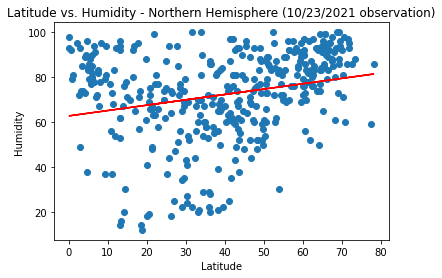

<Figure size 432x288 with 0 Axes>

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for humidity and latitude for the Northern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(north_data['Lat'], north_data['Humidity'])[0], 2)

# establish linear regression values
model = linregress(north_data['Lat'], north_data['Humidity'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = north_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(north_data['Lat'], north_data['Humidity'])
plt.title(f"Latitude vs. Humidity - Northern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(north_data['Lat'], y_values, color='red')

plt.show()
plt.savefig('output_data/lat_vs_humid_lr_north.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R = 0.13   Slope = 0.19
Weak Positive Correlation



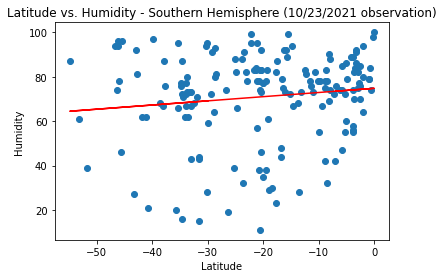

<Figure size 432x288 with 0 Axes>

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for humidity and latitude for the Southern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(south_data['Lat'], south_data['Humidity'])[0], 2)

# establish linear regression values
model = linregress(south_data['Lat'], south_data['Humidity'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = south_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(south_data['Lat'], south_data['Humidity'])
plt.title(f"Latitude vs. Humidity - Southern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(south_data['Lat'], y_values, color='red')

plt.show()
plt.savefig('output_data/lat_vs_humid_lr_south.png')

The preceding two charts plot humidity vs. latitude for the Northern and Southern hemispheres.  Both show a weak correlation between humidity and latitude.  The regression line for the Northern hemisphere actually predicts decreasing humidity moving away from the equator, which is counterintuitive and may indicate that any correlation is coincidental.  The Southern hemisphere show a slight higher Correlation Coefficient with humidity increase as latitudes approach the equator.  This may be due to the closer proximity of Southern hemisphere cities to coastlines and their associated impact on humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R = 0.18   Slope = 0.35
Weak Positive Correlation



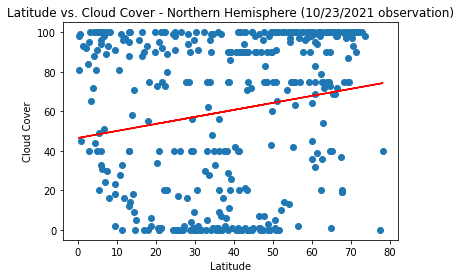

<Figure size 432x288 with 0 Axes>

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for cloud cover and latitude for the Northern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(north_data['Lat'], north_data['Clouds'])[0], 2)

# establish linear regression values
model = linregress(north_data['Lat'], north_data['Clouds'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = north_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(north_data['Lat'], north_data['Clouds'])
plt.title(f"Latitude vs. Cloud Cover - Northern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.plot(north_data['Lat'], y_values, color='red')

plt.show()
plt.savefig('output_data/lat_vs_clouds_lr_north.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R = 0.23   Slope = 0.65
Weak Positive Correlation



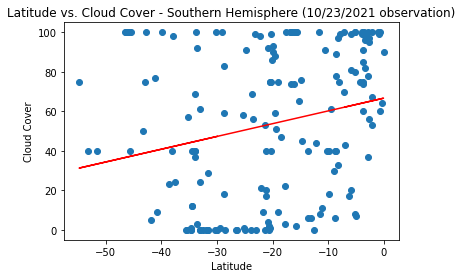

<Figure size 432x288 with 0 Axes>

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for cloud cover and latitude for the Southern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(south_data['Lat'], south_data['Clouds'])[0], 2)

# establish linear regression values
model = linregress(south_data['Lat'], south_data['Clouds'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = south_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(south_data['Lat'], south_data['Clouds'])
plt.title(f"Latitude vs. Cloud Cover - Southern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.plot(south_data['Lat'], y_values, color='red')

plt.show()
plt.savefig('output_data/lat_vs_clouds_lr_south.png')

The preceding two plots show cloud cover vs. latitude.  Both the Northern and Southern hemispheres have very weak Correlation Coefficients.  As discussed earlier, due to the dynamic and variable nature of cloud activity, we would need to look at more than a single observation in order to do a meaninful analysis.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R = 0.17   Slope = 0.04
Weak Positive Correlation



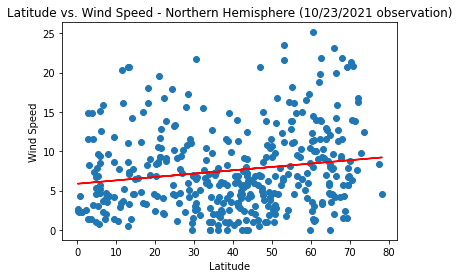

<Figure size 432x288 with 0 Axes>

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for wind speed and latitude for the Northern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(north_data['Lat'], north_data['Winds'])[0], 2)

# establish linear regression values
model = linregress(north_data['Lat'], north_data['Winds'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = north_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(north_data['Lat'], north_data['Winds'])
plt.title(f"Latitude vs. Wind Speed - Northern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(north_data['Lat'], y_values, color='red')

plt.show()
plt.savefig('output_data/lat_vs_winds_lr_north.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R = -0.31   Slope = -0.15
Weak Negative Correlation



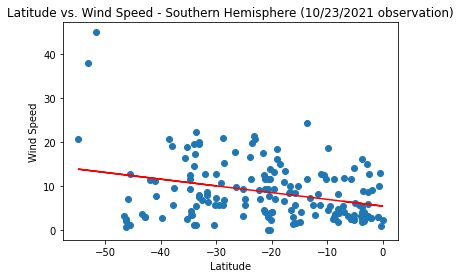

<Figure size 432x288 with 0 Axes>

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for wind speed and latitude for the Southern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(south_data['Lat'], south_data['Winds'])[0], 2)

# establish linear regression values
model = linregress(south_data['Lat'], south_data['Winds'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = south_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(south_data['Lat'], south_data['Winds'])
plt.title(f"Latitude vs. Wind Speed - Southern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(south_data['Lat'], y_values, color='red')

plt.show()
plt.savefig('output_data/lat_vs_winds_lr_south.png')

The two preceding plots show wind speed vs. latitude.  Both the Northern and Southern hemispheres have very weak Correlation Coefficients.  As discussed earlier, due to the dynamic and variable nature of wind speed, we would need to look at more than a single observation in order to do a meaninful analysis.